In [256]:
#!/usr/bin/python
"""BigQuery I/O PySpark example."""
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName('spark-bigquery-polyglot-language-demo') \
    .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-with-dependencies_2.12-0.25.2.jar') \
    .getOrCreate()

In [261]:
from pyspark.sql.functions import size, col

# Load data from BigQuery.
df = spark.read.format('bigquery') \
  .option('table', 'bigquery-public-data.github_repos.languages') \
  .load()

# Cleaning up the data that does not have any languages.
df = df.where(size(col("language")) > 0)
df.printSchema()

3324170
root
 |-- repo_name: string (nullable = true)
 |-- language: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- bytes: long (nullable = true)



In [258]:
# seperate monoglot(single language used) repos and polyglot(multiple languages used) repos.
mono = df.where(size(col("language")) == 1)
mono.createOrReplaceTempView('mono_view')
poly = df.where(size(col("language")) > 1)
poly.createOrReplaceTempView('poly_view')
print(f"The number of repositories that use only one language is {mono.count()}")
print(f"The number of repositories that use multiple language is {poly.count()}")

The number of repositories that use only one language is 1203352


The number of repositories that use multiple language is 1752351


+--------------------+------+
|                name|   cnt|
+--------------------+------+
|[CSS, HTML, JavaS...|174297|
|   [CSS, JavaScript]| 60504|
|  [HTML, JavaScript]| 53508|
|     [Python, Shell]| 33747|
|[CSS, JavaScript,...| 31060|
|[CSS, HTML, JavaS...| 27271|
|         [CSS, HTML]| 26973|
|[CSS, HTML, JavaS...| 22760|
| [Objective-C, Ruby]| 21534|
|       [Ruby, Shell]| 19761|
+--------------------+------+



<AxesSubplot:ylabel='cnt'>

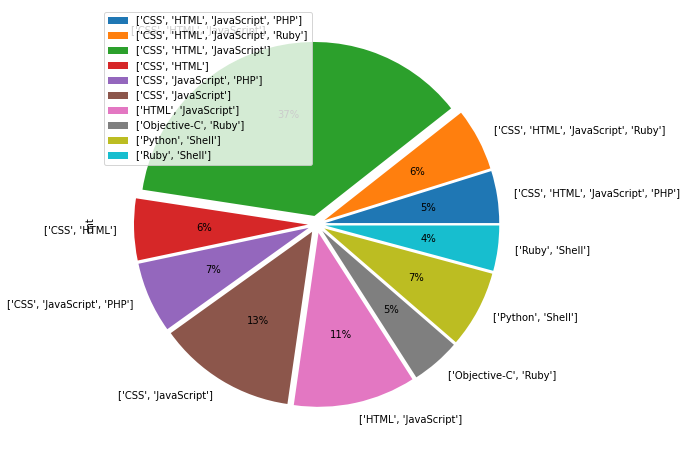

In [262]:
# Sort the monoglot repositories by the popularity of languages and see the top 10 languages.
ranking = spark.sql("""
    SELECT
        poly_view.language.name, 
        count(poly_view.language.name) AS cnt
    FROM 
        poly_view
    GROUP BY poly_view.language.name
    ORDER BY
        cnt DESC
    LIMIT 10
""")
ranking.show()
rank_panda = ranking.toPandas()
rank_panda = rank_panda.astype({"name": 'str'}, errors='raise')
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
rank_panda.groupby(['name']).sum().plot(kind='pie', y='cnt', autopct='%1.0f%%', figsize=(8, 8), explode=explode)

[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]


In [ ]:
# fcore = single.where(col('repo_name')=="Frankenhooker/FCore")
# fcore.select(col("repo_name"), col("language"), size(col("language"))).show()

# #standardSQL
# SELECT repo_name, elem.name, elem.bytes
# FROM `github_activity_data.languages`, UNNEST(language) as elem
# WHERE 
# ORDER BY elem.bytes DESC


# spark.sql('SELECT DISTINCT repo_name, language FROM single_view').show()
# single.withColumn("test", explode($"language")).show

# print(single, poly)
# print(_all, single, poly)
# single = df.select(col("repo_name"), col("language"), size(col("language"))
#     )
# single.show()
# df.groupBy(size(col("language"))).show()
# test_words.printSchema()

# Saving the data to BigQuery
# word_count.write.format('bigquery') \
#   .option('table', 'wordcount_dataset.wordcount_output') \
#   .save()

In [202]:
import pandas as pd
  
# DataFrame of each student and the votes they get
dataframe = pd.DataFrame({'Name': ['Aparna', 'Aparna', 'Aparna', 
                                   'Aparna', 'Aparna', 'Juhi', 
                                   'Juhi', 'Juhi', 'Juhi', 'Juhi',
                                   'Suprabhat', 'Suprabhat', 
                                   'Suprabhat', 'Suprabhat', 
                                   'Suprabhat'],
                          'votes_of_each_class': [12, 9, 17, 19, 
                                                  20, 11, 15, 12, 
                                                  9, 4, 22, 19, 17, 
                                                  19, 18]})
  
# Plotting the pie chart for above dataframe
print(dataframe.groupby(['Name']).sum())

           votes_of_each_class
Name                          
Aparna                      77
Juhi                        51
Suprabhat                   95
